In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab 
import matplotlib.pyplot as plt
import os
from astropy.io import fits
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [3]:
# get data from JAXA DARTS
# https://www.darts.isas.jaxa.jp/planet/project/hayabusa2/
file=["hyb2_onc_20151204_040908_tvf_l2a.fit","hyb2_onc_20151204_041012_tbf_l2a.fit",\
"hyb2_onc_20151204_040921_twf_l2a.fit","hyb2_onc_20151204_041025_tuf_l2a.fit",\
"hyb2_onc_20151204_040940_txf_l2a.fit","hyb2_onc_20151204_040959_tpf_l2a.fit"]
band=[550,480,700,390,860,950]

In [4]:
#your directory
dirh="/home/kawahara/articles/astrobio/data/haya2_earth"

In [5]:
img=[]
bandn=[]
A=0.06
B=1
for i in range(0,len(file)):
    hdulist = fits.open(os.path.join(dirh,file[i]))
    eimg=((np.array(hdulist[1].data)))
    #eimg=((np.array(hdulist[1].data)/6000.)*B)**(1.0/2.2)
    img.append(eimg)
    bandn.append(hdulist[1].header["FILTER"])

FW_TO_ERR_0=                 0 / FWD TIME OUT ERROR COUNT                        [astropy.io.fits.card]
FW_NULL_0= 'NON     '          / FWD NULL POSITION FLG:  NON/NULL                [astropy.io.fits.card]
FW_POS_SNSR_0= 'OFF     '      / FWD NULL POSITION FLG:  NON/NULL                [astropy.io.fits.card]
FW_CNT_ERR_0=                0 / FWD COUNTER ERR CNT                             [astropy.io.fits.card]
FW_STEP_CNT_0= '0x0000  '      / FWD STEP COUNTER                                [astropy.io.fits.card]
FW_TO_ERR_1=                 0 / FWD TIME OUT ERROR COUNT                        [astropy.io.fits.card]
FW_NULL_1= 'NON     '          / FWD NULL POSITION FLG:  NON/NULL                [astropy.io.fits.card]
FW_POS_SNSR_1= 'OFF     '      / FWD NULL POSITION FLG:  NON/NULL                [astropy.io.fits.card]
FW_CNT_ERR_1=                0 / FWD COUNTER ERR CNT                             [astropy.io.fits.card]
FW_STEP_CNT_1= '0x0000  '      / FWD STEP COUNTER               

/home/kawahara/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: divide by zero encountered in true_divide
/home/kawahara/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in true_divide


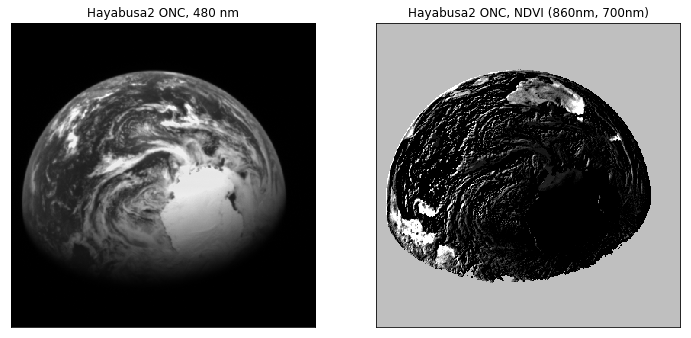

In [8]:
dx=1
dy=1
ix4=250;ex4=650;iy4=250;ey4=650
ix2=250+dx;ex2=650+dx;iy2=250+dy;ey2=650+dy
ndvi=np.array(img[4][ix4:ex4,iy4:ey4]-img[2][ix2:ex2,iy2:ey2])/np.array(img[4][ix4:ex4,iy4:ey4]+img[2][ix2:ex2,iy2:ey2])
mask=(img[2][ix2:ex2,iy2:ey2]<100)
ndvi[mask]=0.15

fig=plt.figure(figsize=(12,6))
ax=fig.add_subplot(1,2,1)
a=ax.imshow((img[1][ix2:ex2,iy2:ey2].T),cmap="gray",vmin=0,vmax=np.max(img[1]))
plt.gca().invert_xaxis()
#plt.colorbar(a)
plt.title("Hayabusa2 ONC, 480 nm")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

ax=fig.add_subplot(1,2,2)
a=ax.imshow(ndvi.T,cmap="gray",vmin=0,vmax=0.2)
plt.gca().invert_xaxis()
plt.title("Hayabusa2 ONC, NDVI (860nm, 700nm)")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])
#plt.savefig("haya2_ndvi.pdf", bbox_inches="tight", pad_inches=0.0)
plt.show()

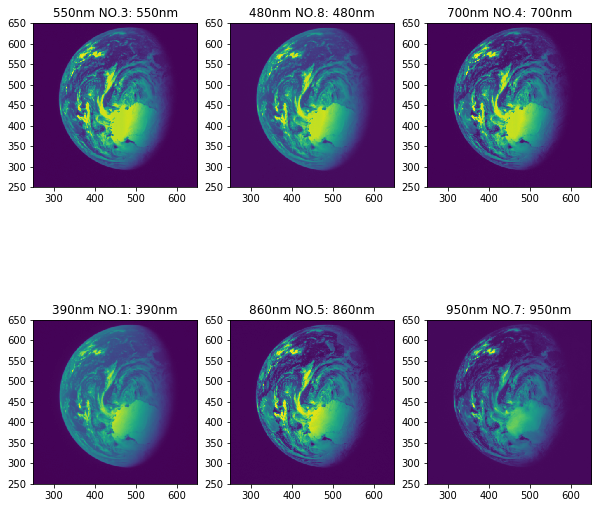

In [7]:
fig=plt.figure(figsize=(10,10))
for i in range(0,len(file)):
    ax=fig.add_subplot(2,3,i+1)
    plt.title(str(band[i])+"nm "+bandn[i])
    a=ax.imshow(img[i])
    #plt.colorbar(a)
    plt.ylim(250,650)
    plt.xlim(250,650)
#plt.savefig("haya2.pdf")
plt.show()